# BMPD HC project
## Spinal cord only - Consensus clustering

In [1]:
import sys

sys.path.append('/media/miplab-nas2/Data3/Nawal/Tools/iCAPs/')
from icap_consensus_clustering import ConsensusClustering
from icap_analyses import iCAPs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nibabel as nib
import os.path
import json
import nibabel as nib

# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 0. Load configuration file

In [12]:
with open('../config/hc_project_icaps_spinalcord.json') as config_file:
    config = json.load(config_file)

## 1. Define number of clusters

#### Instantiate consensus clustering object

In [10]:
consensus = ConsensusClustering(config=config)

#### Plot average consensus

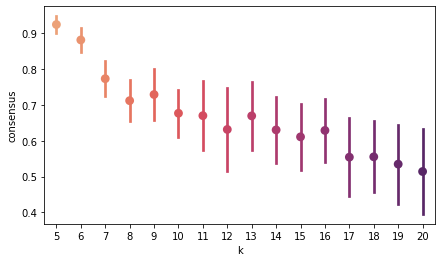

In [11]:
consensus.plot_avg_consensus()

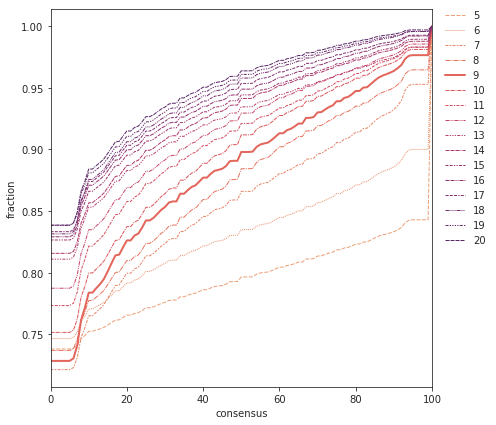

In [47]:
consensus.plot_cdf(to_highlight=[9])

#### Display iCAPs

In [27]:
icaps = iCAPs(config,17)

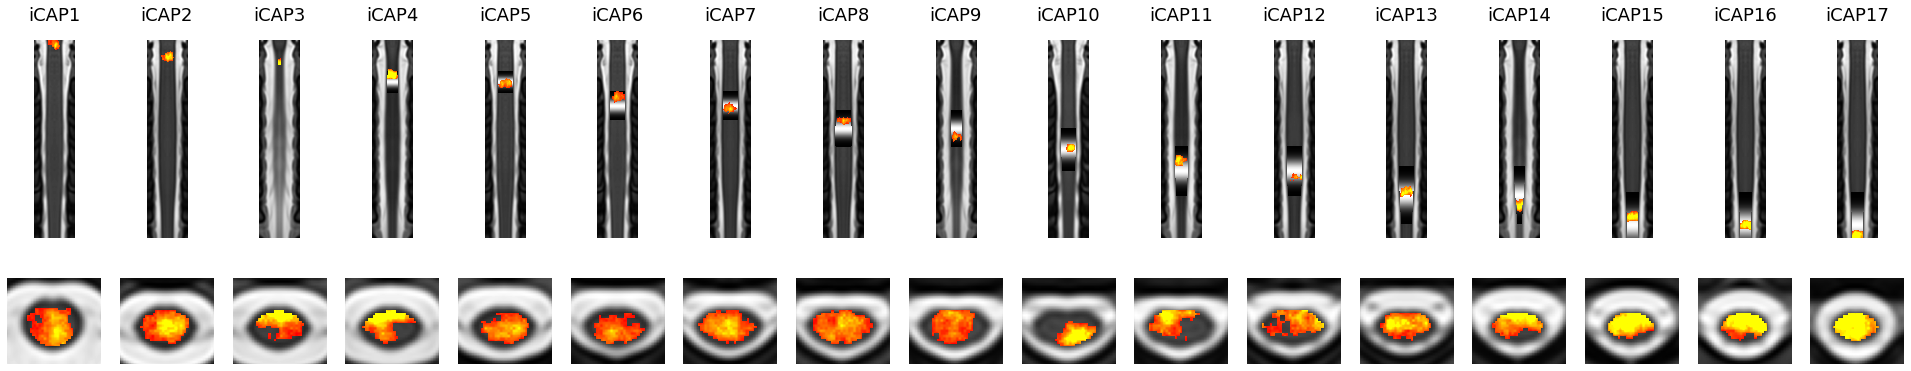

In [28]:
icaps.plot(lthresh=3.1,uthresh=6,colormap='autumn',save_results=True,show_spinal_levels=True)

In [ ]:
np.array